# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

Mount drive to access the dataset

In [103]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/lab-subsetting-and-descriptive-stats/your-code/')

Mounted at /content/drive


In [104]:
from google.colab import files
# uploaded = files.upload()

#### Import all the libraries that are necessary

In [105]:
# import libraries here
import pandas as pd
import numpy as np 
import seaborn as sns
# import os

In [106]:
# import json
# import requests

In [107]:
# from pandas import json_normalize
# import time

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [108]:
# your answer here
temp = pd.read_csv("drive/MyDrive/Colab Notebooks/lab-subsetting-and-descriptive-stats/your-code/Temp_States.csv",encoding = "ISO-8859-1")

#### Print `temp`

In [109]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [110]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

Dataset with three columns of which two contain object type data and one float type

In [111]:
temp.info()
type(temp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


pandas.core.frame.DataFrame

In [112]:
temp.shape

(7, 3)

#### Select the rows where state is New York

In [113]:
new_york = temp[temp["State"] == "New York"]
new_york

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [114]:
# your answer here
average_temperature = new_york["Temperature"].mean()
print(average_temperature)

10.74074074074074


#### We want to know cities and states with Temperature above 15 degress Celcius

In [115]:
filtrado_temp = temp.loc[temp["Temperature"] > 15]
filtrado_temp

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [116]:
filtrado_cities = temp.loc[(temp["Temperature"] > 15), ["City", "Temperature"]]
filtrado_cities

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [117]:
filtrado_cities2 = temp.loc[(temp["Temperature"] > 15) & (temp["Temperature"] < 20), ["City", "Temperature"]]
filtrado_cities2

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [118]:
for item in list(temp.State.unique()):
  df_temp =temp[temp["State"] == item]
  
  print(item, 'mean:', df_temp.Temperature.mean())
  print(item, 'std:', np.std(df_temp.Temperature))


New York mean: 10.74074074074074
New York std: 6.64089669520041
Connecticut mean: 15.833333333333332
Connecticut std: 1.3888888888888884
New Jersey mean: 21.111111111111107
New Jersey std: 1.111111111111109


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [119]:
employee = pd.read_csv("drive/MyDrive/Colab Notebooks/lab-subsetting-and-descriptive-stats/your-code/Employee.csv",encoding = "ISO-8859-1")

In [120]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [121]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

Dataset with 7 columns: 5 contain object type data and 2 float type

In [122]:
employee.info()
type(employee)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


pandas.core.frame.DataFrame

In [123]:
employee.shape

(9, 7)

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

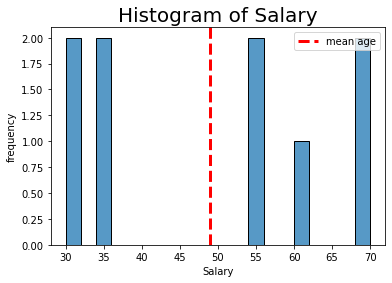

In [124]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.histplot(employee.Salary, bins=20)

# plot the mean
plt.axvline(
    employee.Salary.mean(),
    c="red",
    linewidth= 3,
    linestyle='--',
    label='mean age'
)

plt.title('Histogram of Salary', size=20)
plt.xlabel('Salary')
plt.ylabel('frequency')
plt.legend()
plt.show()

The graph shows that the mean roughly matches salaries equal to 50.

In addition, the following salaries have the same frequency:

(30 and 70) 

(35 and 55)
 
(50 and 60)

#### What's the average salary in this company?

In [125]:
average_salary = employee["Salary"].mean()
print(average_salary)

48.888888888888886


#### What's the highest salary?

In [126]:
highest_salary = employee["Salary"].max()
print(highest_salary)

70


#### What's the lowest salary?

In [127]:
lowest_salary = employee["Salary"].min()
print(lowest_salary)

30


#### Who are the employees with the lowest salary?

In [128]:
lowest_salary_employees = employee[employee["Salary"] == 30]
lowest_salary_employees

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [129]:
david_information = employee[employee["Name"] == 'David']
david_information

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [130]:
print('David salary:',  david_information.iloc[0]['Salary'])

David salary: 30


#### Print all the rows where job title is associate

In [131]:
associate = employee[employee["Title"] == "associate"]
associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [132]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [133]:
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [134]:
associate1 = employee.loc[(employee["Title"] == "associate") & (employee["Salary"] > 55)]
associate1

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [135]:
for item in list(employee.Years.unique()):
  df_temp =employee[employee["Years"] == item]
  
  print('years of employment:',item, 'mean:', df_temp.Salary.mean())


years of employment: 1 mean: 35.0
years of employment: 2 mean: 38.333333333333336
years of employment: 4 mean: 35.0
years of employment: 3 mean: 55.0
years of employment: 8 mean: 70.0
years of employment: 7 mean: 60.0


####  What is the average Salary per title?

In [136]:
for item in list(employee.Title.unique()):
  df_temp =employee[employee["Title"] == item]
  
  print(item, 'mean:', df_temp.Salary.mean())

analyst mean: 32.5
associate mean: 56.666666666666664
VP mean: 70.0


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

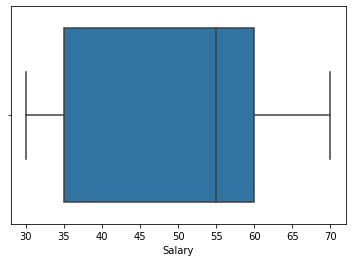

In [137]:
sns.boxplot(x="Salary", data=employee)

In [138]:
pd.Series(employee.Salary).quantile(np.linspace(0, 1, 11))

0.0    30.0
0.1    30.0
0.2    33.0
0.3    35.0
0.4    39.0
0.5    55.0
0.6    55.0
0.7    58.0
0.8    64.0
0.9    70.0
1.0    70.0
Name: Salary, dtype: float64

In [139]:
# print first quartile here
pd.Series(employee.Salary).quantile(0.1)

30.0

In [140]:
# print third quartile here
pd.Series(employee.Salary).quantile(0.3)

35.0

#### Is the mean salary per gender different?

In [141]:
for item in list(employee.Gender.unique()):
  df_temp =employee[employee["Gender"] == item]
  
  print(item, 'mean:', df_temp.Salary.mean())


M mean: 50.0
F mean: 47.5


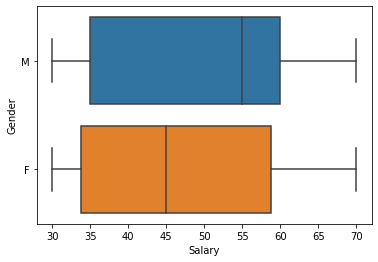

In [142]:
sns.boxplot(x="Salary",  
            data=employee, 
            y='Gender')

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [143]:
employee.loc['Total minimum'] = pd.Series(employee[['Years','Salary']].min(), index = ['Years','Salary'])
employee.loc['Total maximum'] = pd.Series(employee[['Years','Salary']].max(), index = ['Years','Salary'])
employee.loc['Total mean'] = pd.Series(employee[['Years','Salary']].mean(), index = ['Years','Salary'])

employee.tail(5)

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7.000000,60.000000
8,Ana,HR,Master,F,VP,8.000000,70.000000
Total minimum,NaN,NaN,NaN,NaN,NaN,1.000000,30.000000
Total maximum,NaN,NaN,NaN,NaN,NaN,8.000000,70.000000
Total mean,NaN,NaN,NaN,NaN,NaN,4.181818,49.090909


In [144]:
for item in list(employee.Department.unique()):
  df_temp =employee[employee["Department"] == item]
  
  
  print(item, 'Years minimum:', df_temp.Years.min())
  print(item, 'Years mean:', df_temp.Years.mean())
  print(item, 'Years minimum:', df_temp.Years.max())
  
  print(item, 'Salary minimum:', df_temp.Salary.min())
  print(item, 'Salary mean:', df_temp.Salary.mean())
  print(item, 'Salary minimum:', df_temp.Salary.max())


IT Years minimum: 1.0
IT Years mean: 4.5
IT Years minimum: 8.0
IT Salary minimum: 30.0
IT Salary mean: 48.75
IT Salary minimum: 70.0
HR Years minimum: 2.0
HR Years mean: 4.666666666666667
HR Years minimum: 8.0
HR Salary minimum: 30.0
HR Salary mean: 45.0
HR Salary minimum: 70.0
Sales Years minimum: 2.0
Sales Years mean: 2.5
Sales Years minimum: 3.0
Sales Salary minimum: 55.0
Sales Salary mean: 55.0
Sales Salary minimum: 55.0
nan Years minimum: nan
nan Years mean: nan
nan Years minimum: nan
nan Salary minimum: nan
nan Salary mean: nan
nan Salary minimum: nan


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [145]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [146]:
orders = pd.read_csv("drive/MyDrive/Colab Notebooks/lab-subsetting-and-descriptive-stats/your-code/Orders.csv",encoding = "ISO-8859-1")

In [147]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [148]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [149]:
orders.info()
type(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


pandas.core.frame.DataFrame

In [150]:
orders.shape

(397924, 14)

####  What is the average Purchase Price?

In [151]:
average_purchase_price = orders["amount_spent"].mean()
print(average_purchase_price)

22.39474850474768


#### What were the highest and lowest purchase prices? 

In [152]:
highest_purchase_prices = orders["amount_spent"].max()
print(highest_purchase_prices)

168469.6


In [153]:
lowest_purchase_prices = orders["amount_spent"].min()
print(lowest_purchase_prices)

0.0


#### Select all the customers we have in Spain

In [154]:
customers_spain = orders[orders["Country"] == 'Spain']
customers_spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [155]:
customers_spain.CustomerID.value_counts().sum()

2485

In [156]:
customers_spain.CustomerID.unique()

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### Select all the customers who have bought more than 50 items ?

In [157]:
filtrado_customers = orders.loc[(orders["Quantity"] > 50)]
filtrado_customers.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Select orders from Spain that are above 50 items

In [158]:
orders_spain = customers_spain.loc[(customers_spain["Quantity"] > 50)]
orders_spain.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [159]:
filtrado_free_rders = orders.loc[(orders["amount_spent"] == 0)]
filtrado_free_rders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [160]:
import re
pattern1 = r'.*[Ll]unch bag.*'

orders_cp = orders.copy()
orders_cp['lb'] = orders.Description.str.match(pat=pattern1)

# orders.loc[re.match(pattern1, str(orders["Description"])) != None]
orders_cp = orders_cp.loc[(orders_cp["lb"] == True)]
orders_cp.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,lb
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50,True
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50,True
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65,True
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65,True
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30,True


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [161]:
filtrado_2011 = orders_cp.loc[(orders_cp["year"] == 2011)]
filtrado_2011.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,lb
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50,True
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50,True
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30,True
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65,True
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65,True


#### Show the frequency distribution of the amount spent in Spain.

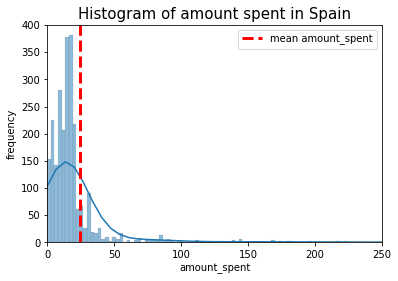

In [162]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.histplot(customers_spain.amount_spent, bins=500, kde=True)

plt.axvline(
    customers_spain.amount_spent.mean(),
    c="red",
    linewidth= 3.,
    linestyle='--',
    label='mean amount_spent'
)

plt.xlim(0, 250)
plt.title('Histogram of amount spent in Spain', size=15)
plt.xlabel('amount_spent')
plt.ylabel('frequency')
plt.legend()



#### Select all orders made in the month of August

In [163]:
filtrado_August = orders.loc[(orders["month"] == 8)]
filtrado_August.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [164]:
filtrado_August.Country.value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [165]:
for item in list(orders.Country.unique()):
  df_temp =orders[orders["Country"] == item]
  
  print(item, 'average of money spent:', df_temp.amount_spent.mean())

United Kingdom average of money spent: 20.625073174457278
France average of money spent: 25.05682690002394
Australia average of money spent: 116.89562025316418
Netherlands average of money spent: 120.79828184511216
Germany average of money spent: 25.311561601415445
Norway average of money spent: 33.736417910447805
EIRE average of money spent: 36.68774523348971
Switzerland average of money spent: 30.642752442996766
Spain average of money spent: 24.779521126760553
Poland average of money spent: 22.22621212121211
Portugal average of money spent: 22.872701778385782
Italy average of money spent: 23.064960422163594
Belgium average of money spent: 20.283771541112735
Lithuania average of money spent: 47.45885714285714
Japan average of money spent: 116.56190031152651
Iceland average of money spent: 23.681318681318665
Channel Islands average of money spent: 27.340160427807437
Denmark average of money spent: 49.88247368421052
Cyprus average of money spent: 22.134169381107483
Sweden average of mon

#### What's the most expensive item?

In [166]:
expensive_item = orders[orders["UnitPrice"] == max(orders["UnitPrice"])]
expensive_item

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [167]:
for item in list(orders.year.unique()):
  df_temp =orders[orders["year"] == item]
  
  print(item, 'average of money spent:', df_temp.amount_spent.mean())

2010 average of money spent: 21.89273279816576
2011 average of money spent: 22.43007395552916
